In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
#configure figure layout
#Refer to https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html#the-matplotlibrc-file
plt.rcParams['axes.labelsize'] = '22'
plt.rcParams['axes.labelweight'] = '600'
plt.rcParams['axes.titlesize'] = '28'
plt.rcParams['axes.titleweight'] = '600'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
plt.rcParams['figure.subplot.hspace'] = 0.3
plt.rcParams['axes.titlepad'] = 15.0
plt.rcParams['axes.labelpad'] = 10.0
plt.rcParams['legend.fontsize'] = 13.0

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']



In [3]:
cali = pd.read_excel('cali.xlsx',sheet_name = 0)
cali.head()

,Date,Time(H.M.S),Temp_LM75/oC,Temp_BME680/oC,Temp_NTC/oC,Pressure/kPa,Humidity_BME/%,Temp_RS,Temp_Laserliner,Humidity_Laserliner/%
0,210429,09.47.59,24.46,33.31,30.58,101.00,28.36,32.0,31.7,32
1,210429,10.22.02,24.46,34.06,31.02,101.01,28.22,32.1,32.3,31
2,210429,10.56.01,24.46,33.63,31.21,101.03,27.64,32.5,32.3,30
3,210429,11.30.17,23.96,33.61,31.12,101.04,30.31,31.9,32.1,32
4,210429,12.04.27,23.46,33.36,31.02,101.05,28.43,32.2,32.0,30


Text(31.5, 32.5, 'y=0.8x+6.3, r2=0.80, p=4.9e-08')

<Figure size 720x720 with 0 Axes>

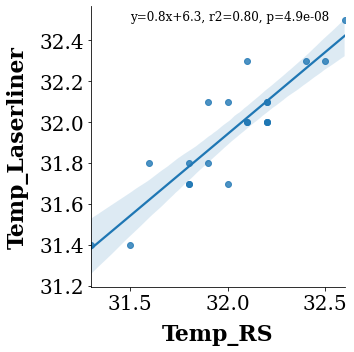

In [45]:
slope, intercept, r, p, std_err = stats.linregress(cali['Temp_RS'],cali['Temp_Laserliner'])

plt.figure(figsize=(10,10))
sns.lmplot(x ='Temp_RS', y='Temp_Laserliner', data = cali)
plt.text(31.5,32.5,'y={0:.1f}x+{1:.1f}'.format(slope,intercept) + ', r2={:.2f}, p={:.2g}'.format(r*r, p), fontsize = 12)

Text(28.5, 32, 'y=0.7x+9.1, r2=0.37, p=0.0036')

<Figure size 720x720 with 0 Axes>

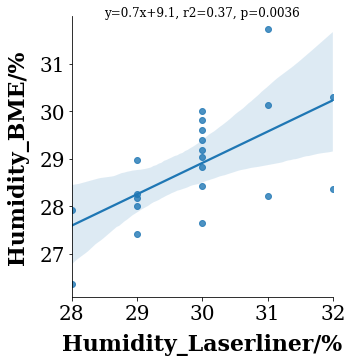

In [46]:
slope, intercept, r, p, std_err = stats.linregress(cali['Humidity_Laserliner/%'],cali['Humidity_BME/%'])

plt.figure(figsize=(10,10))
sns.lmplot(x ='Humidity_Laserliner/%', y='Humidity_BME/%', data = cali)
plt.text(28.5,32,'y={0:.1f}x+{1:.1f}'.format(slope,intercept) + ', r2={:.2f}, p={:.2g}'.format(r*r, p), fontsize = 12)

In [4]:
r1, p1 = stats.pearsonr(cali['Temp_RS'],cali['Temp_Laserliner'])
r2, p2 = stats.pearsonr(cali['Humidity_Laserliner/%'],cali['Humidity_BME/%'])

fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.regplot(x ='Temp_RS', y='Temp_Laserliner', data = cali, ax = ax[0])
ax[0].annotate('r={:.2f}, p={:.2g}'.format(r1, p1), xy = (0,1))
sns.regplot(x ='Humidity_Laserliner/%', y='Humidity_BME/%', data = cali, ax = ax[1])
ax[1].annotate('r={:.2f}, p={:.2g}'.format(r2, p2), xy = (0,1))

TypeError: lmplot() got an unexpected keyword argument 'ax'

/home/zd101/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



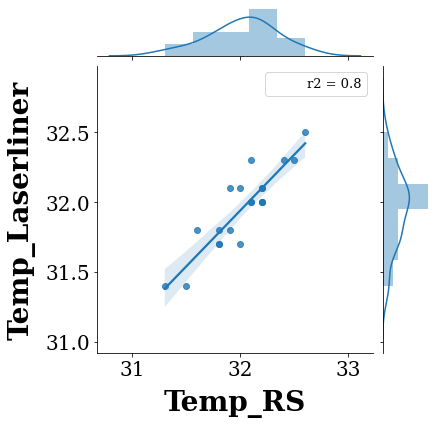

In [31]:
r, p = sp.stats.pearsonr(cali['Temp_RS'],cali['Temp_Laserliner'])
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),

sns.jointplot(x ='Temp_RS', y='Temp_Laserliner', data = cali,kind="reg", stat_func=r2)

In [14]:
temp_time = cali.melt(['Time(H.M.S)'], ['Temp_LM75/oC','Temp_BME680/oC','Temp_NTC/oC','Temp_RS','Temp_Laserliner'])
hum_time = cali.melt(['Time(H.M.S)'], ['Humidity_BME/%','Humidity_Laserliner/%'])

temp_rs = cali.melt(['Temp_RS'], ['Temp_LM75/oC','Temp_BME680/oC','Temp_NTC/oC','Temp_Laserliner'])

(    Time(H.M.S)         variable  value
 0      09.47.59     Temp_LM75/oC  24.46
 1      10.22.02     Temp_LM75/oC  24.46
 2      10.56.01     Temp_LM75/oC  24.46
 3      11.30.17     Temp_LM75/oC  23.96
 4      12.04.27     Temp_LM75/oC  23.46
 ..          ...              ...    ...
 160         NaN  Temp_Laserliner    NaN
 161         NaN  Temp_Laserliner    NaN
 162         NaN  Temp_Laserliner    NaN
 163         NaN  Temp_Laserliner    NaN
 164         NaN  Temp_Laserliner    NaN
 
 [165 rows x 3 columns],    Time(H.M.S)               variable  value
 0     09.47.59         Humidity_BME/%  28.36
 1     10.22.02         Humidity_BME/%  28.22
 2     10.56.01         Humidity_BME/%  27.64
 3     11.30.17         Humidity_BME/%  30.31
 4     12.04.27         Humidity_BME/%  28.43
 ..         ...                    ...    ...
 61         NaN  Humidity_Laserliner/%    NaN
 62         NaN  Humidity_Laserliner/%    NaN
 63         NaN  Humidity_Laserliner/%    NaN
 64         NaN  Humid

In [15]:
sns.lmplot(x="variable", y="value", hue="variable",

,Time(H.M.S),variable,value
0,09.47.59,Temp_LM75/oC,24.46
1,10.22.02,Temp_LM75/oC,24.46
2,10.56.01,Temp_LM75/oC,24.46
3,11.30.17,Temp_LM75/oC,23.96
4,12.04.27,Temp_LM75/oC,23.46
...,...,...,...
160,NaN,Temp_Laserliner,NaN
161,NaN,Temp_Laserliner,NaN
162,NaN,Temp_Laserliner,NaN
163,NaN,Temp_Laserliner,NaN


<AxesSubplot:xlabel='Time(H.M.S)', ylabel='Temp_Laserliner'>

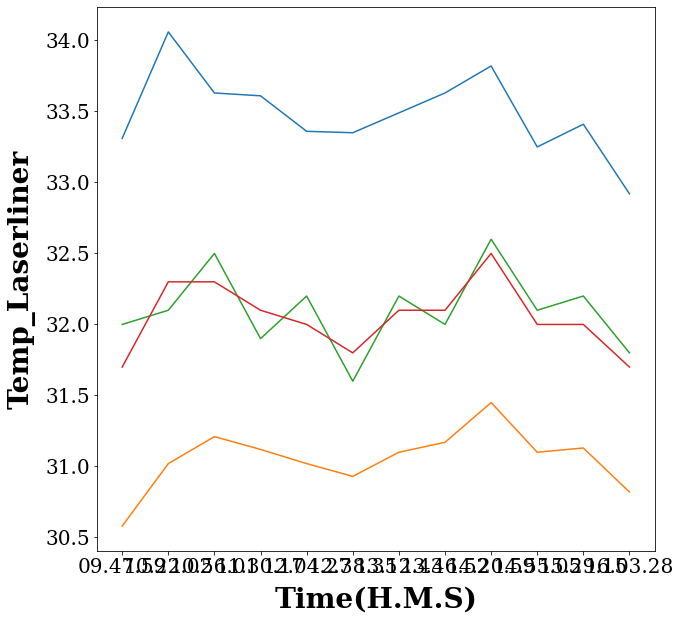

In [12]:
plt.figure(figsize = (10,10))
sns.lineplot(x= 'Time(H.M.S)', y = 'Temp_BME680/oC', data = cali[cali['Date'] == 210429])
sns.lineplot(x= 'Time(H.M.S)', y = 'Temp_NTC/oC', data = cali[cali['Date'] == 210429])
sns.lineplot(x= 'Time(H.M.S)', y = 'Temp_RS', data = cali[cali['Date'] == 210429])
sns.lineplot(x= 'Time(H.M.S)', y = 'Temp_Laserliner', data = cali[cali['Date'] == 210429])

<IPython.core.display.Javascript object>

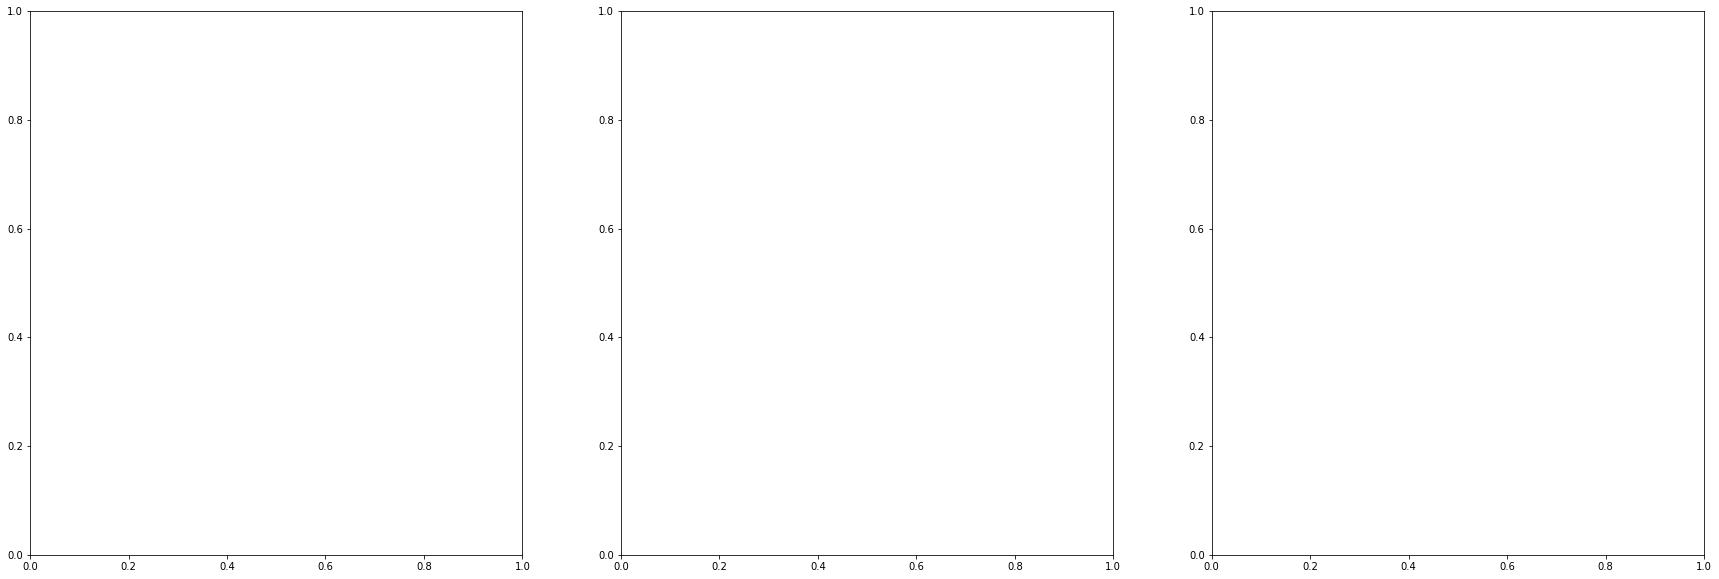

In [2]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.swarmplot(x = )